<a href="https://colab.research.google.com/github/danielbauer1979/ML_656/blob/main/SLC_Assignment_FashionClassification_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Fashion MNIST dataset

In this homework problem, we will work with the Fashion MNIST data that is also available in the Keras library:

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

The dataset is fairly analogous to the MNIST data -- it's also 28 by 28 pixel images, although in this case the images are of fashion items and the labels correspond to different fashion items -- here is the label	description:
- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

The problem, obviously, is to predict what kind of fashion item is on the image.

Let's take a look at the data:

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


...and at a few of the items:

2


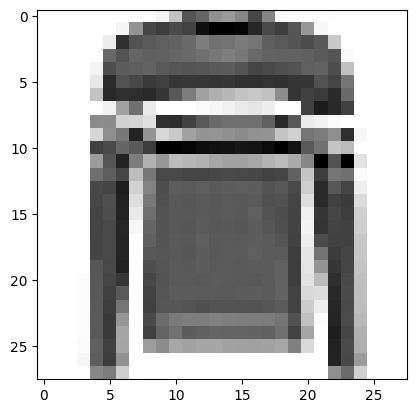

In [3]:
image_index = 5
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

...so this is a pullover.

9


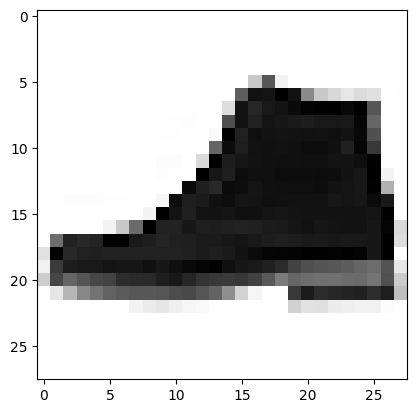

In [4]:
image_index = 42
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

So this is an ankle boot.

**Objective:** Build a neural network model that can classify the fashion items.

## Solution:

### Data Formatting:

In [5]:
np.random.seed(42)

num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train / 255
x_test = x_test/ 255

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 8)                 43272     
                                                                 
 dense_1 (Dense)             (None, 10)                90        
                                                                 
Total params: 43682 (170.63 KB)
Trainable params: 43682 (170.63 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [9]:
history = model.fit(x_train, y_train, epochs=20, batch_size = 128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 25s 51ms/step - loss: 0.8801 - accuracy: 0.6848 - val_loss: 0.5847 - val_accuracy: 0.7838
Epoch 2/20
469/469 [==============================] - 23s 49ms/step - loss: 0.5098 - accuracy: 0.8206 - val_loss: 0.4898 - val_accuracy: 0.8288
Epoch 3/20
469/469 [==============================] - 26s 55ms/step - loss: 0.4385 - accuracy: 0.8478 - val_loss: 0.4515 - val_accuracy: 0.8395
Epoch 4/20
469/469 [==============================] - 23s 48ms/step - loss: 0.3879 - accuracy: 0.8655 - val_loss: 0.4085 - val_accuracy: 0.8581
Epoch 5/20
469/469 [==============================] - 24s 52ms/step - loss: 0.3538 - accuracy: 0.8763 - val_loss: 0.3782 - val_accuracy: 0.8678
Epoch 6/20
469/469 [==============================] - 22s 48ms/step - loss: 0.3288 - accuracy: 0.8852 - val_loss: 0.3589 - val_accuracy: 0.8738
Epoch 7/20
469/469 [==============================] - 24s 52ms/step - loss: 0.3101 - accuracy: 0.8908 - val_loss: 0.3474 - val_accuracy:

313/313 [==============================] - 2s 8ms/step


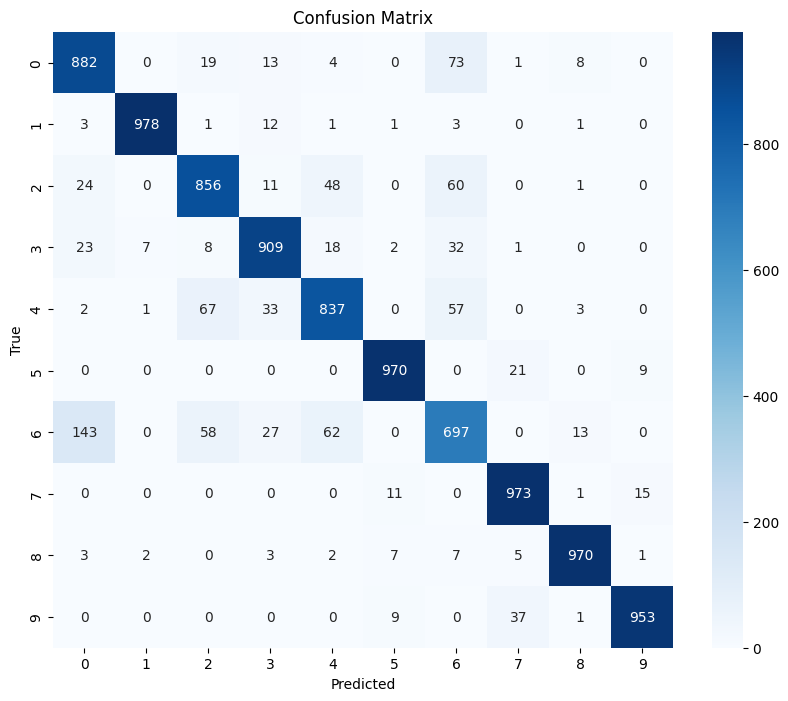

In [15]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred, labels=list(range(num_classes)))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=list(range(num_classes)), yticklabels=list(range(num_classes)))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Maybe not surpirisng that shirt and t-shirt present a challenge...

1/1 [==============================] - 0s 22ms/step


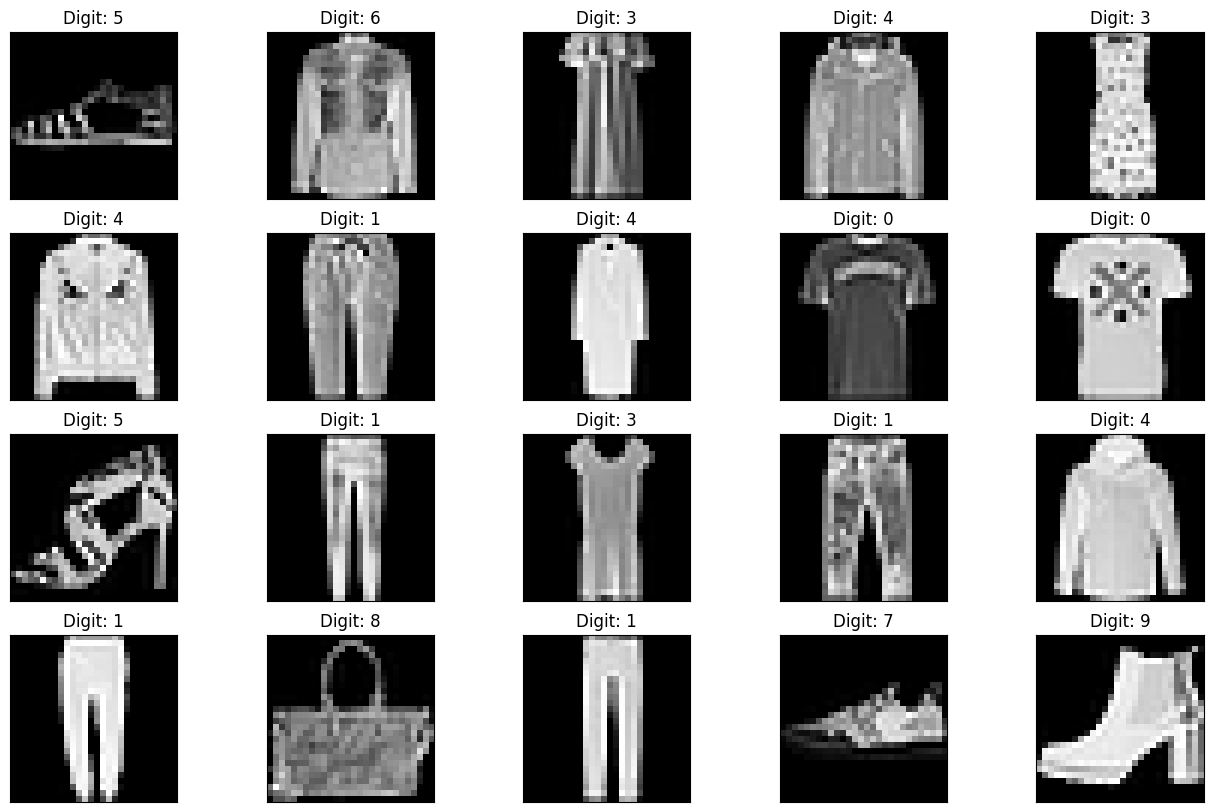

In [10]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])

random.seed(5)

plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(x_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)

plt.show()